In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [79]:
plates = cv2.imread('../DATA/car_plate.jpg')
plates = cv2.cvtColor(plates, cv2.COLOR_BGR2RGB)

In [80]:
def display(img):
    plt.figure(figsize=(12,10))
    plt.imshow(img)
    return

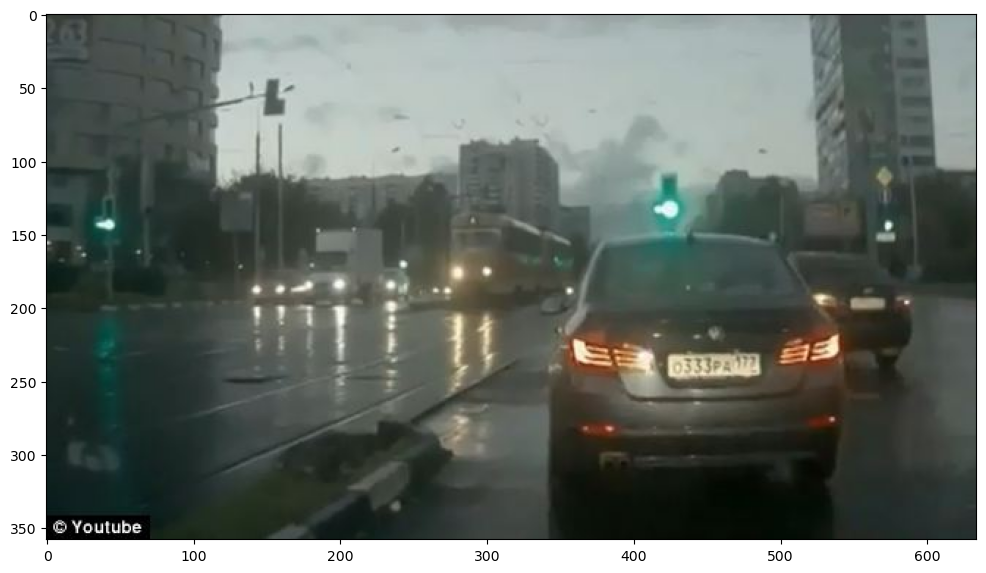

In [81]:
display(plates)

In [82]:
plate_check= cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_licence_plate_rus_16stages.xml')

In [83]:
def plate_detection(img):
    plate_img = img.copy()
    plate_rects = plate_check.detectMultiScale(plate_img)
    
    for (x,y, w,h) in plate_rects:
        cv2.rectangle(plate_img, (x, y), (x+w, y+h), (255,255,255), thickness=2)
    return plate_img

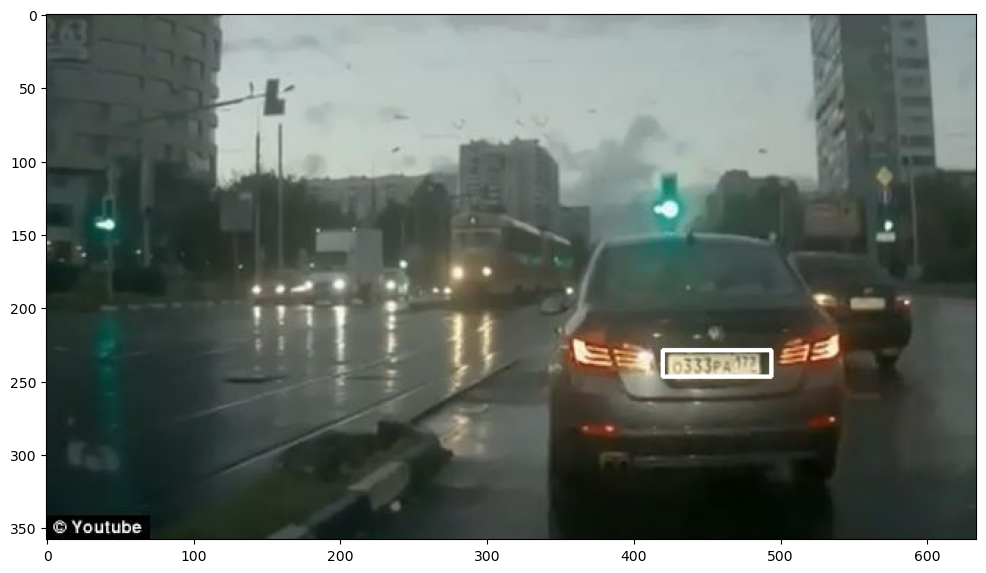

In [84]:
plate_detected = plate_detection(plates)
display(plate_detected)

In [85]:
def blur_car_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = plate_check.detectMultiScale(plate_img)
    
    for (x,y,w,h) in plate_rects:
        
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 7)
        
        plate_img[y:y+h, x:x+w] = blurred_roi
        
    return plate_img

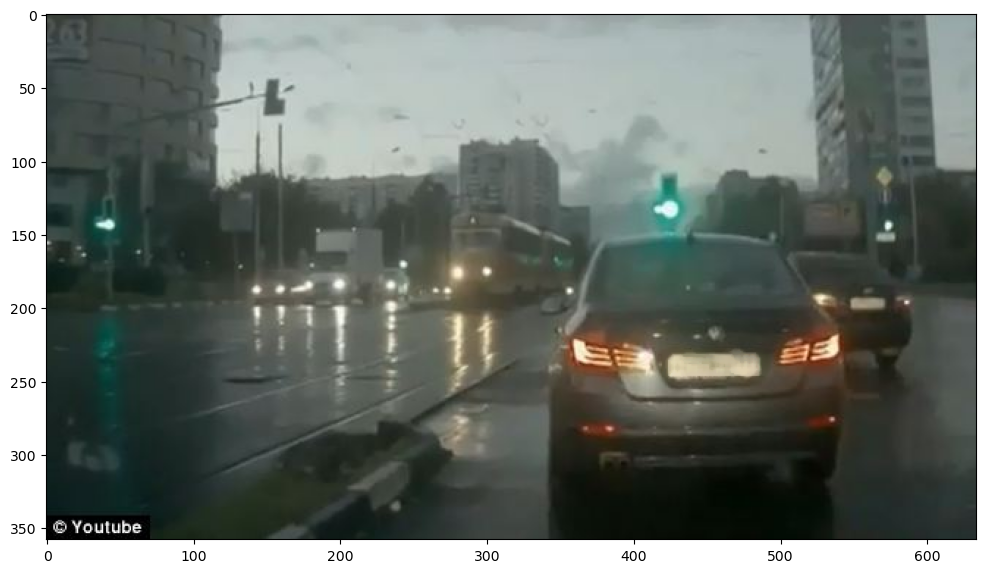

In [86]:
result = blur_car_plate(plates)
display(result)